<div style="width: 95%; background-color: #fff87e; color: #0B638B; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px;">

<h1>Asheville NC Airbnb Data Analysis</h1>

For business inquiries or collaboration requests, you can reach me at: peige77@gmail.com

The data being used represents quarterly Airbnb listings from 2022 for Asheville NC, data was collected from <a href="http://insideairbnb.com/get-the-data/" style="color: #00296b; font-weight: bold;">http://insideairbnb.com/get-the-data/</a>

**Tools & Software utilized:**

- Python with JupyterLab (data cleaning, transformation, manipulation & visualization)
- Excel (data visualization and dashboard creation)
- Tableau (data visualization and dashboaion)
</div>


<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    
## Project Objective, Goals & Questions:
- Identify which factors have the strongest correlation with price.
- Determine the average nightly rent based on the number of; bedrooms, beds, bathrooms and zipcode.
- Determine the number of rentals available based on; bedrooms, beds, bathrooms and zipcode.
- Determine the average price of an Airbnb rental in Asheville NC depending on the number of bedrooms
- Identify the cheapest and most expensive time to rent an Airbnb in Asheville

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">
   Installing Libraries
</div>

In [1]:
#Import libraries and assign aliases for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

In [2]:
# Import our CSV file
df = pd.read_csv("C:/Users/PM/Desktop/Data Analytics Projects/Asheville AirBNB/Extracted Dataset/listings.csv")

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">

#### Data Exploration
</div>

In [3]:
# Use head function to confirm our CSV loaded correctly and contains the correct columns
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,108061,Rental unit in Asheville · ★4.51 · 1 bedroom · 1 bed · 1 bath,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.64,2,319,2,NaN
1,155305,Guesthouse in Asheville · ★4.59 · 1 bedroom · 1 bed · 1 bath,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,101,1,389,2023-06-11,2.69,7,342,30,NaN
2,156805,Home in Asheville · ★4.52 · 1 bedroom · 1 bed · 2.5 shared baths,746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.47,7,0,0,NaN


In [4]:
# Use shape function to determine the number of rows (3239) and the number of columns (18)
df.shape

(3239, 18)

In [5]:
# Use describe function to view basic statistical data
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.239000e+03,3.239000e+03,0.0,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,2990.000000,3239.000000,3239.000000,3239.000000,0.0
mean,2.146711e+17,1.450559e+08,NaN,28792.455696,35.576312,-82.558220,179.771843,5.289287,96.828033,2.569973,8.561593,203.831121,22.231862,NaN
std,3.385774e+17,1.446869e+08,NaN,30.571726,0.049131,0.048249,156.068212,10.894603,129.230118,2.146080,21.885105,121.883685,24.833124,NaN
min,1.080610e+05,4.134000e+03,NaN,28704.000000,35.422810,-82.691050,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.614485e+07,2.502874e+07,NaN,28801.000000,35.560585,-82.592560,95.000000,1.000000,10.000000,0.990000,1.000000,91.500000,3.000000,NaN
50%,4.534908e+07,9.630593e+07,NaN,28804.000000,35.587260,-82.557530,135.000000,2.000000,47.000000,2.045000,1.000000,221.000000,14.000000,NaN
75%,5.900062e+17,2.124610e+08,NaN,28806.000000,35.606236,-82.521310,212.500000,2.000000,134.000000,3.590000,4.000000,321.000000,33.000000,NaN
max,9.151074e+17,5.201809e+08,NaN,28806.000000,35.656090,-82.457480,2059.000000,180.000000,1196.000000,14.790000,113.000000,365.000000,183.000000,NaN


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Data Transformation
</div>

In [6]:
# After looking at the columns we have some extras that we dont need so ill drop them
df.drop(['neighbourhood_group','last_review','reviews_per_month','license'],axis=1, inplace=True)

In [7]:
# using shape function to confirm 4 columns were dropped
df.shape

(3239, 14)

In [8]:
# Confirming the correct 4 columns were dropped
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,108061,Rental unit in Asheville · ★4.51 · 1 bedroom · 1 bed · 1 bath,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2
1,155305,Guesthouse in Asheville · ★4.59 · 1 bedroom · 1 bed · 1 bath,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30
2,156805,Home in Asheville · ★4.52 · 1 bedroom · 1 bed · 2.5 shared baths,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0


In [9]:
# Split the 'name' columns using the split function and delimiter ' · ' (this is a middle dot NOT a period)
name=[]
for element in df['name']:
    name.append(element.split(" · "))
df['name'] = name

In [10]:
# Two of the categories: 'bed' and 'bedroom' are very similar so I will convert 'bedrooms' into 'sleeping_rooms'
for data in df["name"]:
    for x in range(len(data)):
        data[x] = data[x].replace("bedrooms", "sleeping_rooms")
        data[x] = data[x].replace("bedroom", "sleeping_rooms")

# Display the first 5 rows to confirm our code correctly charnged 'bedroom' and 'bedrooms' into 'sleeping_rooms'
df["name"].head(5)

0          [Rental unit in Asheville, ★4.51, 1 sleeping_rooms, 1 bed, 1 bath]
1           [Guesthouse in Asheville, ★4.59, 1 sleeping_rooms, 1 bed, 1 bath]
2       [Home in Asheville, ★4.52, 1 sleeping_rooms, 1 bed, 2.5 shared baths]
3    [Hostel in Asheville, ★4.69, 1 sleeping_rooms, 6 beds, 2.5 shared baths]
4         [Home in Asheville, ★4.96, 1 sleeping_rooms, 1 bed, 1 private bath]
Name: name, dtype: object

In [11]:
# Now that the various categories in the 'name' column have been broken up its time to create seperate columns for each
rental_type = []
rating = []
sleeping_rooms = []
bed = []
bath = []

for data in df["name"]:
    found_rating = False
    found_sleeping_rooms = False
    found_bed = False
    found_bath = False
    
    rental_type.append(data[0])
    
    for x in data:
        if "★" in x:
            found_rating = True
            rating.append(x)
        elif "sleeping_rooms" in x:
            found_sleeping_rooms = True
            sleeping_rooms.append(x)
        elif "bed" in x:
            found_bed = True
            bed.append(x)
        elif "bath" in x:
            found_bath = True
            bath.append(x)
            
    if found_rating == False:
        rating.append(np.nan)
    if found_sleeping_rooms == False:
        sleeping_rooms.append(np.nan)
    if found_bed == False:
        bed.append(np.nan)
    if found_bath == False:
        bath.append(np.nan)

In [12]:
# assigning each list its own column
df["rental_type"] = rental_type
df["rating"] = rating
df["sleeping_rooms"] = sleeping_rooms
df["bed"] = bed
df["bath"] = bath

In [13]:
# checking to see if our columns populate correctly
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,"[Rental unit in Asheville, ★4.51, 1 sleeping_rooms, 1 bed, 1 bath]",320564,Lisa,28801,35.6067,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,★4.51,1 sleeping_rooms,1 bed,1 bath


In [14]:
# We no longer need the 'name' column so we will drop it and update our datafraome
df.drop('name', axis = 1, inplace= True)

In [15]:
# confirming the 'name' column was dropped
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,★4.51,1 sleeping_rooms,1 bed,1 bath
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,★4.59,1 sleeping_rooms,1 bed,1 bath
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,★4.52,1 sleeping_rooms,1 bed,2.5 shared baths


<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">

#### Data Cleaning
</div>

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Cleaning the <code>'rating'</code> column to seperate it from '★' ensuring consistency amoung values.

In [16]:
# Determining the NAN and unique values present in the 'rating' column
nan_count = df['rating'].isna().sum()

unique_count = df['rating'].nunique()

print(f"Number of NAN values in the 'rating' column: {nan_count}")
print(f"Number of unique values in the 'rating' column: {unique_count}")

Number of NAN values in the 'rating' column: 304
Number of unique values in the 'rating' column: 81


In [17]:
# Seperating the '★' from the actual numerical rating
rating_list = []
for x in df['rating']:
    if x is not np.nan:
        if "New" in x:
            rating_list.append(float(x.replace("★New", "0")))
        else:
            rating_list.append(float(x.replace("★", "")))
    else:
        rating_list.append(np.nan)
df['rating']= rating_list
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1 sleeping_rooms,1 bed,1 bath
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,4.59,1 sleeping_rooms,1 bed,1 bath
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,4.52,1 sleeping_rooms,1 bed,2.5 shared baths


<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Cleaning the <code>'sleeping_rooms'</code> column to seperate it the numeric value from the word sleeping_rooms.

In [18]:
# Determining the NAN and unique values present in the 'sleeping_rooms' column
nan_count = df['sleeping_rooms'].isna().sum()
unique_count = df['sleeping_rooms'].nunique()

print(f"Number of NAN values in the 'sleeping_rooms' column: {nan_count}")
print(f"Number of unique values in the 'sleeping_rooms' column: {unique_count}")

Number of NAN values in the 'sleeping_rooms' column: 148
Number of unique values in the 'sleeping_rooms' column: 11


In [19]:
# Checking to see each of the unique values in the 'sleeping_rooms' column
df['sleeping_rooms'].unique()

array(['1 sleeping_rooms', '2 sleeping_rooms', '4 sleeping_rooms',
       '3 sleeping_rooms', nan, '6 sleeping_rooms', '5 sleeping_rooms',
       '7 sleeping_rooms', '18 sleeping_rooms', '8 sleeping_rooms',
       '10 sleeping_rooms', '9 sleeping_rooms'], dtype=object)

In [20]:
bedrooms = []

for x in df['sleeping_rooms']:
    if x is not np.nan:
        bedrooms.append(float(x.split(" ")[0]))
    else:
        bedrooms.append(float(np.nan))

df['sleeping_rooms'] = bedrooms
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1 bed,1 bath
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,4.59,1.0,1 bed,1 bath
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,4.52,1.0,1 bed,2.5 shared baths


<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Cleaning the <code>'bed'</code> column to seperate it the numeric value from the word bed.

In [21]:
# Determining the NAN and unique values present in the 'bed' column
nan_count = df['bed'].isna().sum()
unique_count = df['bed'].nunique()

print(f"Number of NAN values in the 'sleeping_rooms' column: {nan_count}")
print(f"Number of unique values in the 'sleeping_rooms' column: {unique_count}")

Number of NAN values in the 'sleeping_rooms' column: 28
Number of unique values in the 'sleeping_rooms' column: 18


In [22]:
# Checking the unique value of 'bed' looks like there will likely be outliers to remove later on
df['bed'].unique()

array(['1 bed', '6 beds', '2 beds', '5 beds', '3 beds', '4 beds',
       '8 beds', '12 beds', '10 beds', '7 beds', '9 beds', nan, '11 beds',
       '14 beds', '13 beds', '20 beds', '21 beds', '16 beds', '15 beds'],
      dtype=object)

In [23]:
sleeping_spaces = []

for spaces in df['bed']:
    if spaces is not np.nan:
        sleeping_spaces.append(float(spaces.split(" ")[0]))
    else:
        sleeping_spaces.append(float(np.nan))

df['bed']= sleeping_spaces
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1.0,1 bath
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,4.59,1.0,1.0,1 bath
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,4.52,1.0,1.0,2.5 shared baths


<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Cleaning the <code>'bath'</code> column to seperate it the numeric value from the word bath.

In [24]:
# Determining the NAN and unique values present in the 'bath' column

nan_count = df['bath'].isna().sum()
unique_count = df['bath'].nunique()

print(f"Number of NAN values in 'bath': {nan_count}")
print(f"Number of unique values in 'bath': {unique_count}")

Number of NAN values in 'bath': 1
Number of unique values in 'bath': 24


In [25]:
# Checking to see each of the unique values in the 'bath' column
df['bath'].unique()

array(['1 bath', '2.5 shared baths', '1 private bath', '1 shared bath',
       '2 baths', '1.5 baths', '2.5 baths', '2 shared baths', '3.5 baths',
       '3 baths', '1.5 shared baths', '4 baths', '0 shared baths',
       '4.5 baths', '0 baths', nan, '5 baths', 'Half-bath', '7 baths',
       '6 baths', '5.5 baths', 'Shared half-bath', '9 baths', '6.5 baths',
       '4.5 shared baths'], dtype=object)

In [26]:
bathrooms= []

for x in df['bath']:
    if x is not np.nan:
        if "-bath" in x:
            bathrooms.append(float(0.5))
        else:
            bathrooms.append(float(x.split(" ")[0]))
    else:
        bathrooms.append(float(np.nan))

df['bath'] = bathrooms
df.head(3)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1.0,1.0
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,4.59,1.0,1.0,1.0
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,4.52,1.0,1.0,2.5


<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Removing <code>null values</code> to ensure consistency in our data.

In [27]:
# Revealing the sum of missing data in each column
df.isnull().sum()

id                                  0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
rental_type                         0
rating                            304
sleeping_rooms                    148
bed                                28
bath                                1
dtype: int64

In [28]:
# We have a ton of null data that could affect our analysis so we will drop the null values

df.dropna(inplace= True)
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
rental_type                       0
rating                            0
sleeping_rooms                    0
bed                               0
bath                              0
dtype: int64

In [29]:
# Checking to see if all null values were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2777 entries, 0 to 3238
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2777 non-null   int64  
 1   host_id                         2777 non-null   int64  
 2   host_name                       2777 non-null   object 
 3   neighbourhood                   2777 non-null   int64  
 4   latitude                        2777 non-null   float64
 5   longitude                       2777 non-null   float64
 6   room_type                       2777 non-null   object 
 7   price                           2777 non-null   int64  
 8   minimum_nights                  2777 non-null   int64  
 9   number_of_reviews               2777 non-null   int64  
 10  calculated_host_listings_count  2777 non-null   int64  
 11  availability_365                2777 non-null   int64  
 12  number_of_reviews_ltm           2777 no

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">

## Exporting Data to a CSV
</div>

In [30]:
file_path = r'C:\Users\PM\Desktop\Data Analytics Projects\Asheville AirBNB\airbnb.csv'
df.to_csv(file_path, index=False)

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">

## Exploratory Data Analysis
</div>

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Determining the correlation between each column based on numerica values only. 

In [31]:
df.head(1)

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.6067,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1.0,1.0


In [32]:
# using the corr function to determine the correlation between each of our numeric columns
df.corr(numeric_only=True)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,sleeping_rooms,bed,bath
id,1.000000,0.366745,-0.079267,-0.067542,-0.021813,0.041948,-0.052691,-0.400369,-0.007639,0.168118,-0.197610,-0.444725,0.108539,0.101392,0.128287
host_id,0.366745,1.000000,-0.101905,-0.107075,-0.028586,0.095059,-0.091626,-0.271341,0.056081,0.193880,-0.063216,-0.151027,0.097581,0.112952,0.102068
neighbourhood,-0.079267,-0.101905,1.000000,0.723719,-0.049166,0.020808,0.058406,0.100742,0.002802,-0.079884,0.079755,0.037474,-0.090597,-0.099367,-0.067298
latitude,-0.067542,-0.107075,0.723719,1.000000,-0.181034,0.045345,0.062137,0.076918,0.029059,-0.067416,0.067745,0.038042,-0.084998,-0.124278,-0.071259
longitude,-0.021813,-0.028586,-0.049166,-0.181034,1.000000,0.077082,-0.013194,-0.005702,0.064450,0.035656,-0.056555,-0.014025,0.055395,0.073951,0.083857
price,0.041948,0.095059,0.020808,0.045345,0.077082,1.000000,-0.095327,-0.179086,0.165484,0.161956,-0.112898,0.015511,0.619240,0.612196,0.655037
minimum_nights,-0.052691,-0.091626,0.058406,0.062137,-0.013194,-0.095327,1.000000,-0.125783,-0.096729,-0.073733,-0.236657,-0.038954,-0.020095,-0.049007,-0.027823
number_of_reviews,-0.400369,-0.271341,0.100742,0.076918,-0.005702,-0.179086,-0.125783,1.000000,-0.128437,-0.099802,0.648115,0.181021,-0.222797,-0.179408,-0.230512
calculated_host_listings_count,-0.007639,0.056081,0.002802,0.029059,0.064450,0.165484,-0.096729,-0.128437,1.000000,0.295913,-0.086850,-0.017979,0.104434,0.143313,0.200902
availability_365,0.168118,0.193880,-0.079884,-0.067416,0.035656,0.161956,-0.073733,-0.099802,0.295913,1.000000,-0.009122,-0.078977,0.184288,0.203112,0.200170


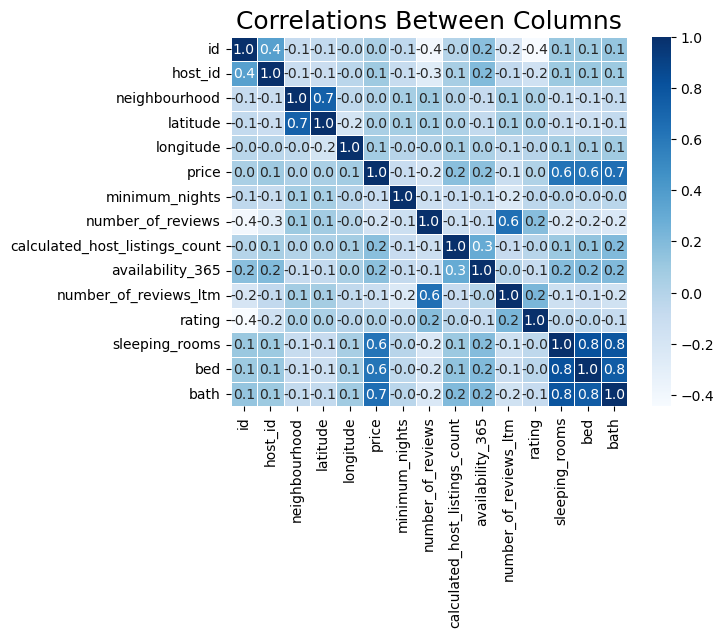

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidth='.5', cmap='Blues')
plt.title('Correlations Between Columns', fontsize= 18)
plt.show()

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Graphing the correlation between the number of <code>bedrooms</code> and <code>price</code> while removing outliers. 

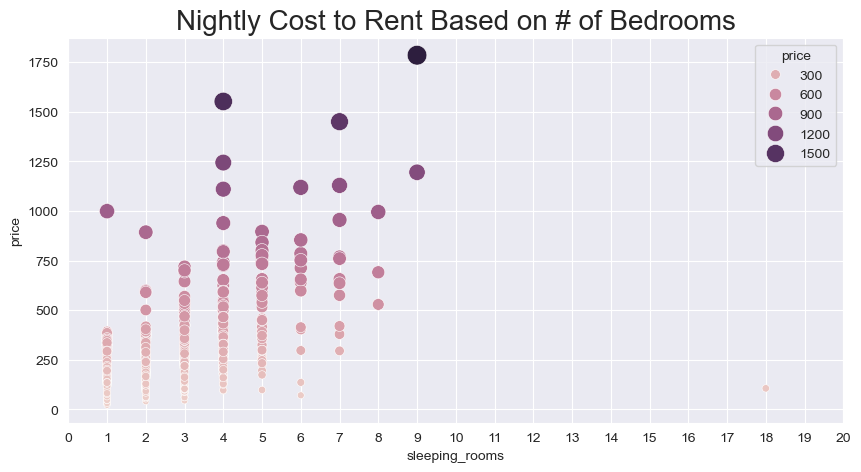

In [34]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(
    data=df, x=df['sleeping_rooms'],
    y=df['price'], hue='price', size='price',
    sizes=(20, 200))


plt.xticks(range(21))
plt.title("Nightly Cost to Rent Based on # of Bedrooms", fontsize= 20)
plt.grid(True)  
plt.show()

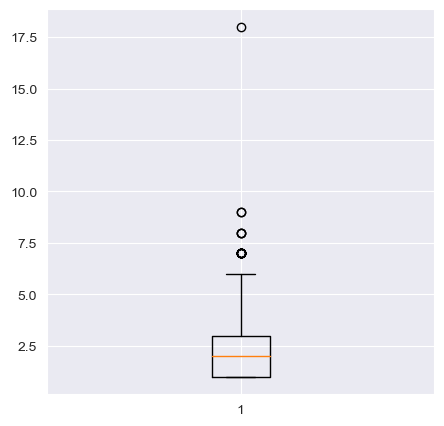

In [35]:
# based on our chart above we have a few outliers that we should remove to normalize our data
plt.figure(figsize=(5,5))
plt.boxplot(df['sleeping_rooms'])
plt.show()

In [36]:
df['sleeping_rooms'].describe()

count    2777.000000
mean        1.962910
std         1.195449
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        18.000000
Name: sleeping_rooms, dtype: float64

In [37]:
# Creating quratiles and inter quatrile range
q1= np.percentile(df['sleeping_rooms'],25)
q3 = np.percentile(df['sleeping_rooms'],75)
iqr = q3 - q1

print(f'First quartile: {q1}')
print(f'Third quartile: {q3}')
print(f'Inter quartile range: {iqr}')

First quartile: 1.0
Third quartile: 3.0
Inter quartile range: 2.0


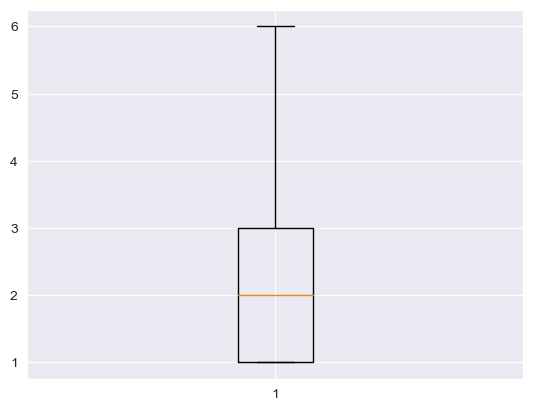

In [38]:
upper_limit = q3 + (iqr * 1.5)
lower_limit = q1 - (iqr * 1.5)

clean_data_sleeping_rooms = []

for outlier in df['sleeping_rooms']:
    if outlier >= lower_limit and outlier <= upper_limit:
        clean_data_sleeping_rooms.append(outlier)

plt.figure()
plt.boxplot(clean_data_sleeping_rooms)
plt.show()

df_sleeping_rooms = df[(df['sleeping_rooms'] >= lower_limit) & (df['sleeping_rooms'] <= upper_limit)]


In [39]:
df_sleeping_rooms.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1.0,1.0
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101,1,389,7,342,30,Guesthouse in Asheville,4.59,1.0,1.0,1.0
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66,1,67,7,0,0,Home in Asheville,4.52,1.0,1.0,2.5
3,156926,746673,BonPaul,28806,35.57864,-82.59578,Shared room,28,1,327,7,365,19,Hostel in Asheville,4.69,1.0,6.0,2.5
4,197263,961396,Timo,28806,35.57808,-82.63689,Private room,45,2,68,2,82,15,Home in Asheville,4.96,1.0,1.0,1.0


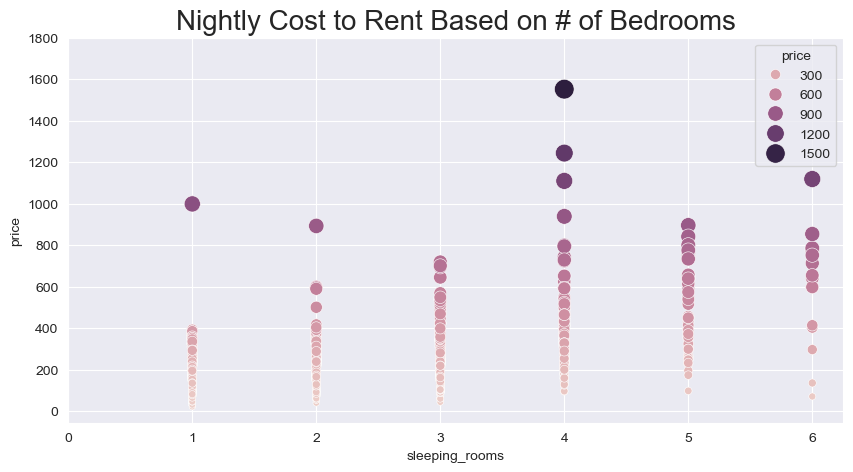

In [40]:
# for tomorrow 10/27 you want to create a new df with the sleeping_rooms data and 
#price data so that you can graph them and eventually add all the other outlier free data
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(
    data=df_sleeping_rooms, x='sleeping_rooms',
    y='price', hue='price', size='price',
    sizes=(20, 200))


plt.xticks(range(7))
plt.yticks(range(0,2000,200))
plt.title("Nightly Cost to Rent Based on # of Bedrooms", fontsize= 20)
plt.grid(True)  
plt.show()

In [41]:
# Replacing df['sleeping_rooms'] column with df_bath['sleeping_rooms'] so our original dataframe is now without outliers
df['sleeping_rooms']=df_sleeping_rooms['sleeping_rooms']

In [42]:
df['sleeping_rooms'].describe()

count    2759.000000
mean        1.923523
std         1.075952
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: sleeping_rooms, dtype: float64

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


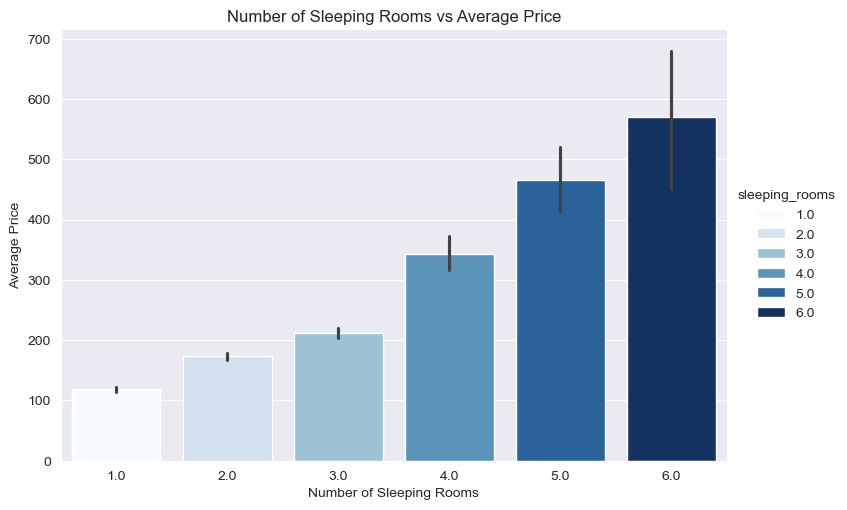

In [43]:
sns.catplot(data=df, x="sleeping_rooms", y="price", kind="bar", aspect=1.5, hue="sleeping_rooms", palette="Blues", legend=True)
plt.title("Number of Sleeping Rooms vs Average Price")
plt.xlabel("Number of Sleeping Rooms")
plt.ylabel("Average Price")
plt.show()

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


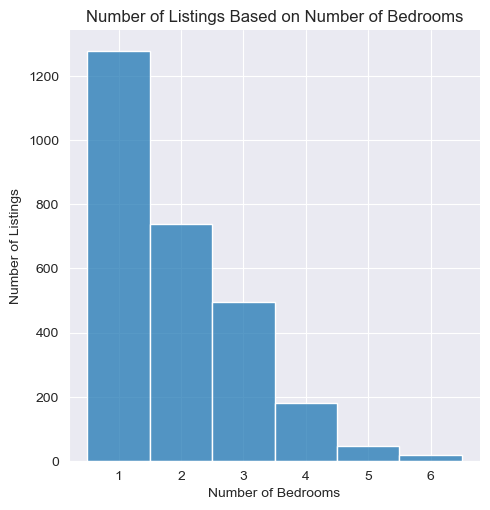

In [44]:
# Graphing the number of listins present based on the number of bedrooms
sns.displot(df['sleeping_rooms'], binwidth=.5, discrete=True)

plt.xticks(range(int(df['sleeping_rooms'].min()), int(df['sleeping_rooms'].max()) + 1))

plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings Based on Number of Bedrooms')

plt.show()

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Graphing the correlation between the number of <code>bed</code> and <code>price</code> while removing outliers. 

In [45]:
df['bed'].describe()

count    2777.000000
mean        2.584444
std         1.923281
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        21.000000
Name: bed, dtype: float64

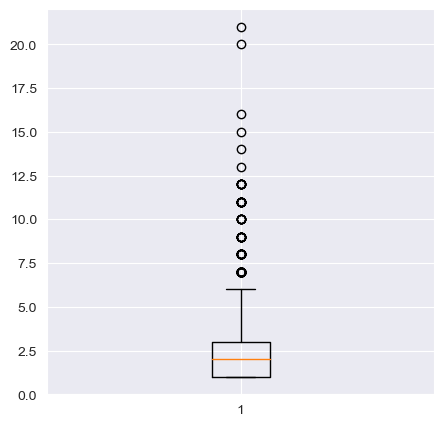

In [46]:
# Removing potential outliers from the bed section
plt.figure(figsize=(5,5))
plt.boxplot(df['bed'])
plt.show()

In [47]:
# Determining quartiles and IQR

q1 = np.percentile(df['bed'],25)
q3 = np.percentile(df['bed'],75)
iqr = q3 - q1

print(f'First quartile of df["bed"]: {q1}')
print(f'Third quartile of df["bed"]: {q3}')
print(f'Interquartile range of df["bed"]: {iqr}')

First quartile of df["bed"]: 1.0
Third quartile of df["bed"]: 3.0
Interquartile range of df["bed"]: 2.0


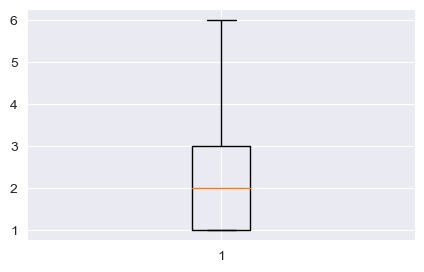

In [48]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1- (1.5 * iqr)

cleaned_data_bed =[]

for outlier in df['bed']:
    if upper_limit >= outlier and lower_limit <= outlier:
        cleaned_data_bed.append(outlier)

plt.figure(figsize=(5,3))
plt.boxplot(cleaned_data_bed)
plt.show()



df_bed = df[(df['bed'] >= lower_limit) & (df['bed'] <= upper_limit)]

In [49]:
df_bed['bed'].describe()

count    2662.000000
mean        2.311044
std         1.333585
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: bed, dtype: float64

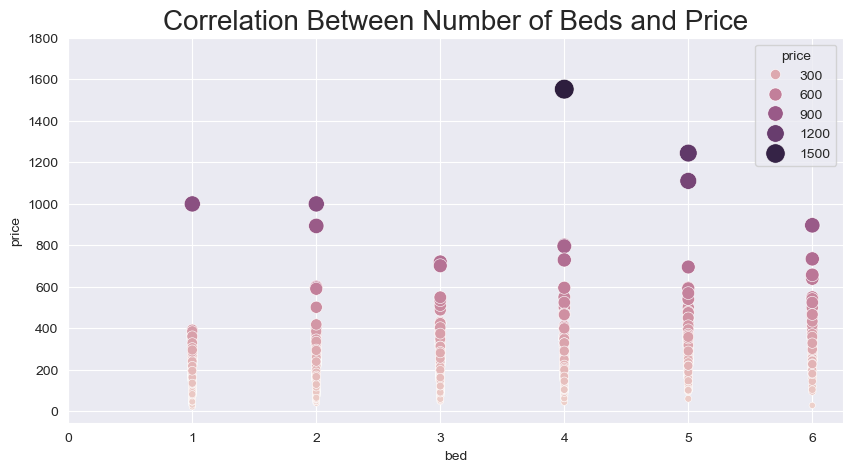

In [50]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(data=df_bed, x= 'bed', y='price', hue='price', size='price', sizes=(20,200))

plt.xticks(range(7))
plt.yticks(range(0,2000, 200))
plt.title('Correlation Between Number of Beds and Price', fontsize= 20)
plt.show()

In [51]:
# Replacing df['bed'] column with df_bath['bed'] so our original dataframe is now without outliers
df['bed']=df_bed['bed']

In [52]:
# Checking to ensure the dataframe has been updated with the new data
df['bed'].describe()

count    2662.000000
mean        2.311044
std         1.333585
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: bed, dtype: float64

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


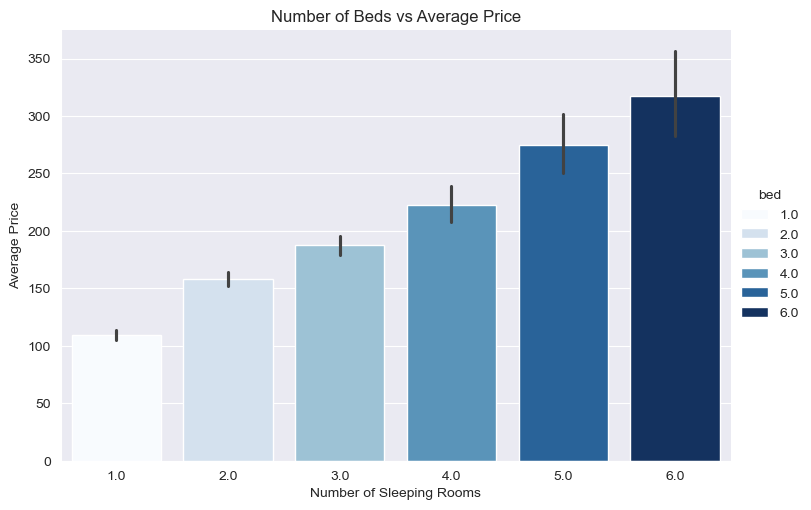

In [53]:
sns.catplot(data=df, x="bed", y="price", kind="bar", aspect=1.5, hue="bed", palette="Blues", legend=True)
plt.title("Number of Beds vs Average Price")
plt.xlabel("Number of Sleeping Rooms")
plt.ylabel("Average Price")
plt.show()

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


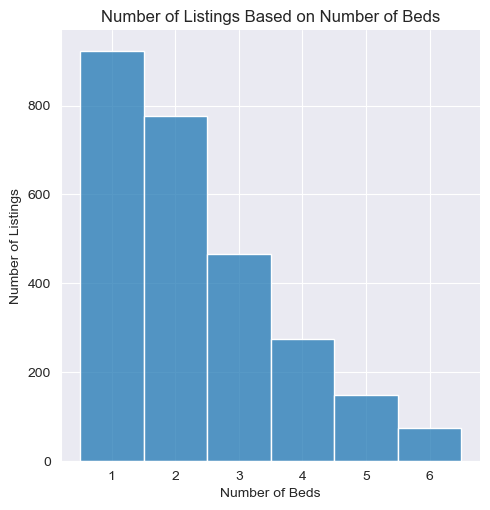

In [54]:
# Graphing the number of listins present based on the number of beds
sns.displot(df['bed'], binwidth=0.5, discrete=True)

plt.xticks(range(int(df['bed'].min()), int(df['bed'].max()) + 1))

plt.xlabel('Number of Beds')
plt.ylabel('Number of Listings')
plt.title('Number of Listings Based on Number of Beds')

plt.show()

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Graphing the correlation between the number of <code>bath</code> and <code>price</code> while removing outliers. 

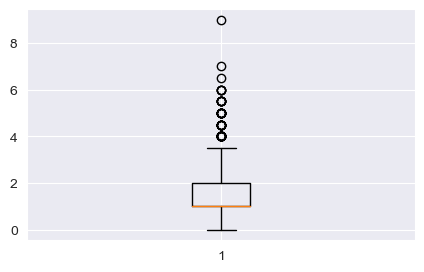

In [55]:
plt.figure(figsize=(5,3))
plt.boxplot(df['bath'])
plt.show()

In [56]:
df['bath'].describe()

count    2777.000000
mean        1.565538
std         0.857786
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: bath, dtype: float64

In [57]:
q1 = np.percentile(df['bath'],25)
q3 = np.percentile(df['bath'],75)
iqr = q3-q1

print(f"First quartile of df['bath']: {q1}")
print(f"Third quartile of df['bath']: {q3}")
print(f"Inter quratile range of df['bath']: {iqr}")

First quartile of df['bath']: 1.0
Third quartile of df['bath']: 2.0
Inter quratile range of df['bath']: 1.0


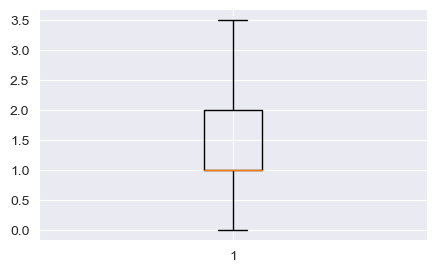

In [58]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

cleaned_data_bath = []

for outlier in df['bath']:
    if upper_limit >= outlier and lower_limit <= outlier:
        cleaned_data_bath.append(outlier)

df_bath = df[(df['bath'] <= upper_limit) & (df['bath'] >= lower_limit)]

plt.figure(figsize=(5,3))
plt.boxplot(cleaned_data_bath)
plt.show()

In [59]:
# Replacing df['bath'] column with df_bath['bath'] so our original dataframe is now without outliers
df['bath']=df_bath['bath']

In [60]:
df['bath'].unique()

array([1. , 2.5, 2. , 1.5, 3.5, 3. , nan, 0. , 0.5])

In [61]:
# I only want to view listings with atleast 1 bathrooms so I will drop the nana values and 0
df = df[(df['bath'] != 0) & (~df['bath'].isna())]

df.reset_index(drop=True, inplace=True)

In [62]:
# Checking if the value were removed
df['bath'].unique()

array([1. , 2.5, 2. , 1.5, 3.5, 3. , 0.5])

In [63]:
df['bath'].describe()

count    2694.000000
mean        1.492019
std         0.683903
min         0.500000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.500000
Name: bath, dtype: float64

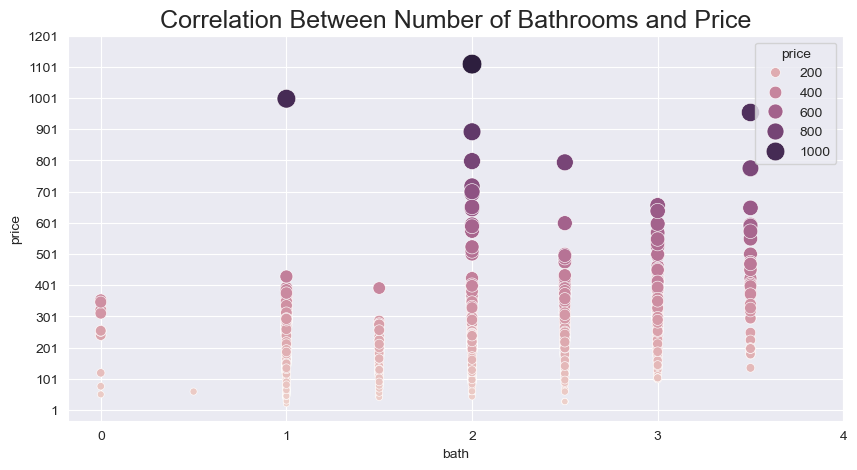

In [64]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(data=df_bath, x='bath', y='price', hue='price', size='price', sizes=(20,200))

plt.xticks(range(5))
plt.yticks(range(1,1300, 100))
plt.title('Correlation Between Number of Bathrooms and Price', fontsize= 18)
plt.show()

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


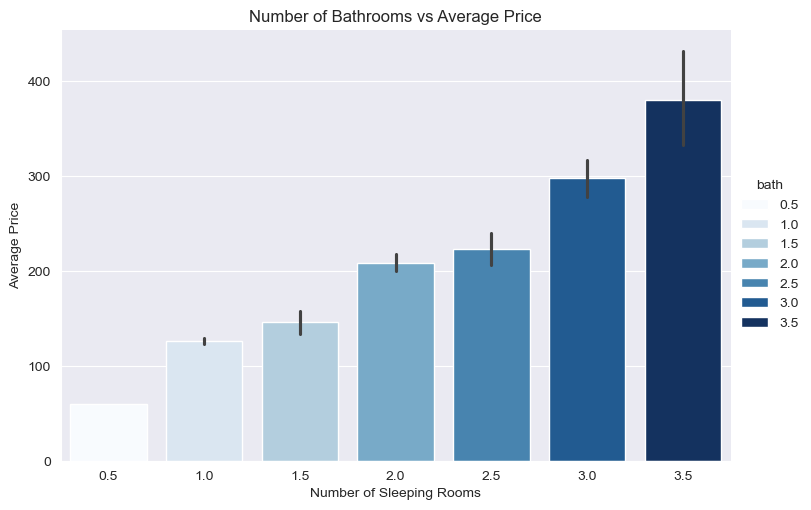

In [65]:
sns.catplot(data=df, x="bath", y="price", kind="bar", aspect=1.5, hue="bath", palette="Blues", legend=True)

plt.title("Number of Bathrooms vs Average Price")
plt.xlabel("Number of Sleeping Rooms")
plt.ylabel("Average Price")
plt.show()

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


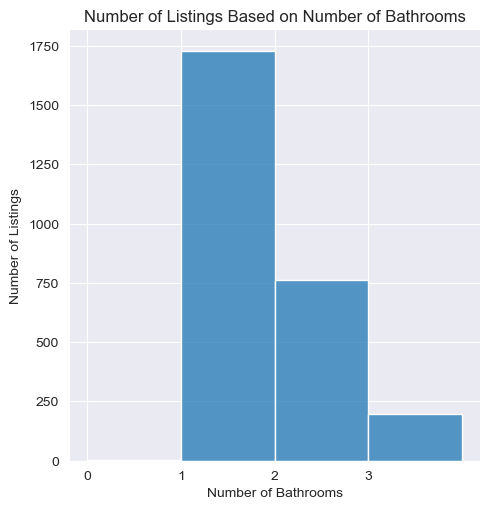

In [66]:
# Graphing the number of listins present based on the number of bathrooms
sns.displot(df['bath'], binwidth=4, discrete=True)

plt.xticks(range(int(df['bath'].min()), int(df['bath'].max())+1))

plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings Based on Number of Bathrooms')

plt.show()

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Removing outliers from the <code>price</code> column.

In [67]:
df['price'].describe()

count    2694.000000
mean      165.407201
std       105.904525
min        21.000000
25%        95.000000
50%       135.000000
75%       202.750000
max      1110.000000
Name: price, dtype: float64

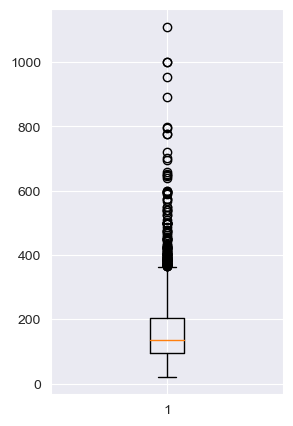

In [68]:
plt.figure(figsize=(3,5))
plt.boxplot(df['price'])
plt.show()

In [69]:
q1 = np.percentile(df['price'],25)
q3 = np.percentile(df['price'],75)
iqr= q3 - q1

print(f"First quartile of df['price']: {q1}")
print(f"Third quartile of df['price']: {q3}")
print(f"Inter quratile range of df['price']: {iqr}")

First quartile of df['price']: 95.0
Third quartile of df['price']: 202.75
Inter quratile range of df['price']: 107.75


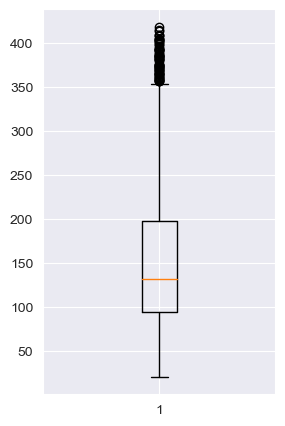

In [70]:
# Asheville is a very popular tourist destination so I will expand our limits by using 2 instead of 1.5 to calculate limits
upper_limit = q3 + (2 * iqr)
lower_limit = q1 - (2 * iqr)

cleaned_data_price = []

for outlier in df['price']:
    if upper_limit >= outlier and lower_limit <= outlier:
        cleaned_data_price.append(outlier)

df_price = df[(df['price']<= upper_limit) & (df['price']>=lower_limit)]

plt.figure(figsize=(3,5))
plt.boxplot(df_price['price'])
plt.show()

In [71]:
df_price['price'].describe()

count    2624.00000
mean      154.67378
std        80.30690
min        21.00000
25%        94.00000
50%       132.00000
75%       198.00000
max       418.00000
Name: price, dtype: float64

In [72]:
# Replacing df['price'] column with df_bath['price'] so our original dataframe is now without outliers
df['price'] = df_price['price']

C:\Users\PM\AppData\Local\Temp\ipykernel_6844\386917283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df_price['price']


In [73]:
# Checking to ensure the dataframe has been updated with the new data
df['price'].describe()

count    2624.00000
mean      154.67378
std        80.30690
min        21.00000
25%        94.00000
50%       132.00000
75%       198.00000
max       418.00000
Name: price, dtype: float64

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Graphing the correlation between the number of <code>zipcode</code> and <code>price</code>.

In [74]:
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,rating,sleeping_rooms,bed,bath
0,108061,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,100.0,30,92,2,319,2,Rental unit in Asheville,4.51,1.0,1.0,1.0
1,155305,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,101.0,1,389,7,342,30,Guesthouse in Asheville,4.59,1.0,1.0,1.0
2,156805,746673,BonPaul,28806,35.57864,-82.59578,Private room,66.0,1,67,7,0,0,Home in Asheville,4.52,1.0,1.0,2.5
3,156926,746673,BonPaul,28806,35.57864,-82.59578,Shared room,28.0,1,327,7,365,19,Hostel in Asheville,4.69,1.0,6.0,2.5
4,197263,961396,Timo,28806,35.57808,-82.63689,Private room,45.0,2,68,2,82,15,Home in Asheville,4.96,1.0,1.0,1.0


C:\Users\PM\AppData\Local\Temp\ipykernel_6844\757637058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='neighbourhood', y='price', kind='bar', palette='Blues')
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


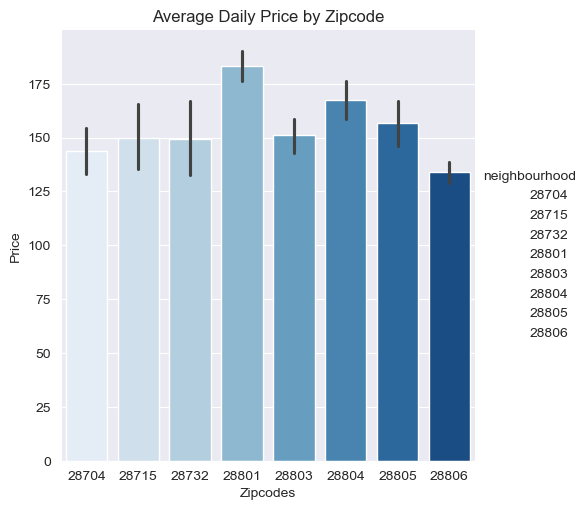

In [75]:
sns.catplot(data=df, x='neighbourhood', y='price', kind='bar', palette='Blues')
plt.xlabel('Zipcodes')
plt.ylabel('Price')
plt.title('Average Daily Price by Zipcode')
plt.show()

C:\Users\PM\AppData\Local\Temp\ipykernel_6844\1776640301.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood', palette='Blues')


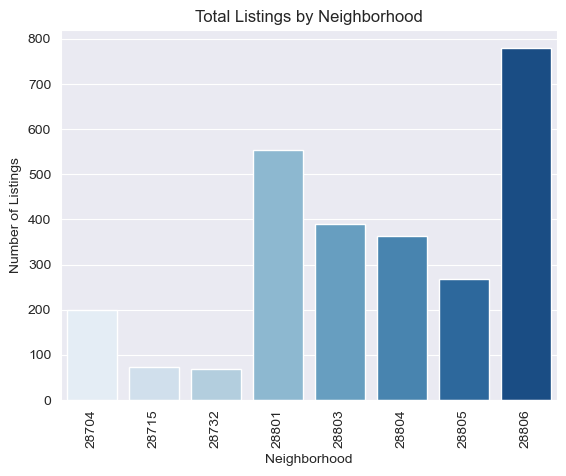

In [76]:
sns.countplot(data=df, x='neighbourhood', palette='Blues')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Total Listings by Neighborhood')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

C:\Users\PM\AppData\Local\Temp\ipykernel_6844\2135370917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="bar", data=df, x="neighbourhood", y="price", palette="Blues", estimator="sum")
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


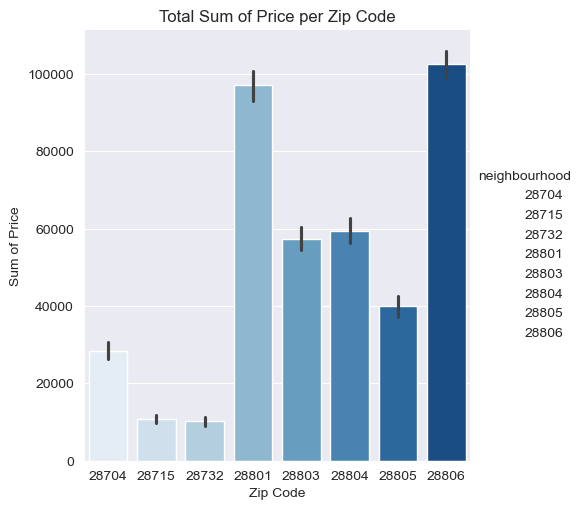

In [77]:
sns.catplot(kind="bar", data=df, x="neighbourhood", y="price", palette="Blues", estimator="sum")
plt.title("Total Sum of Price per Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Sum of Price")
plt.show()

C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PM\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Us

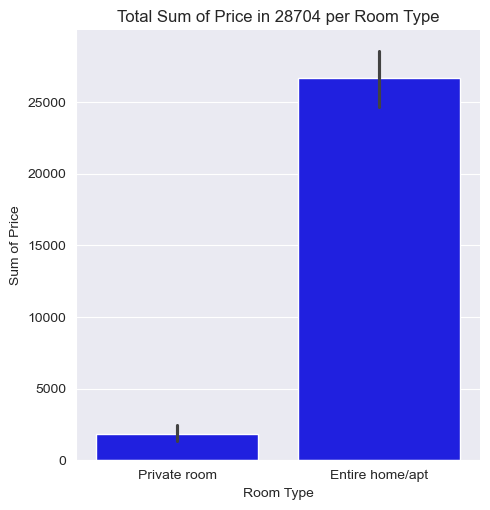

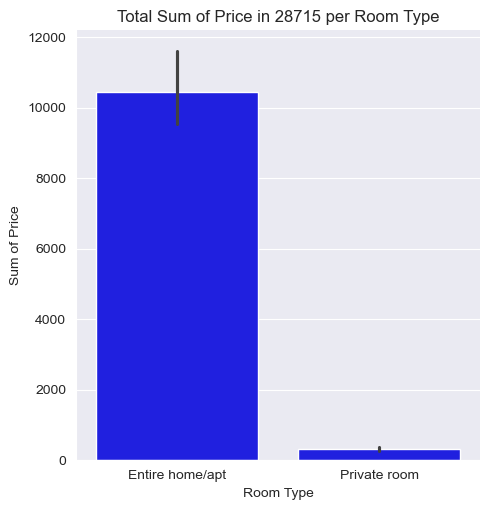

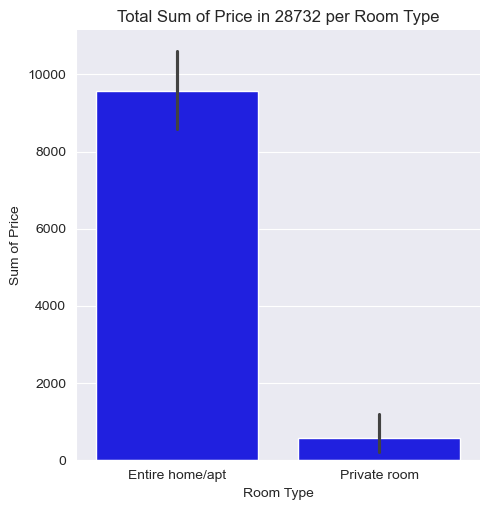

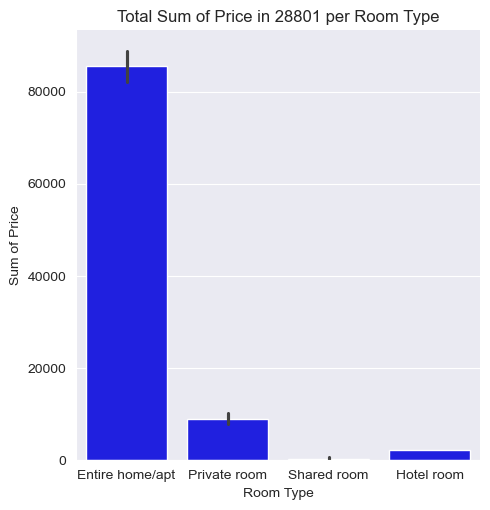

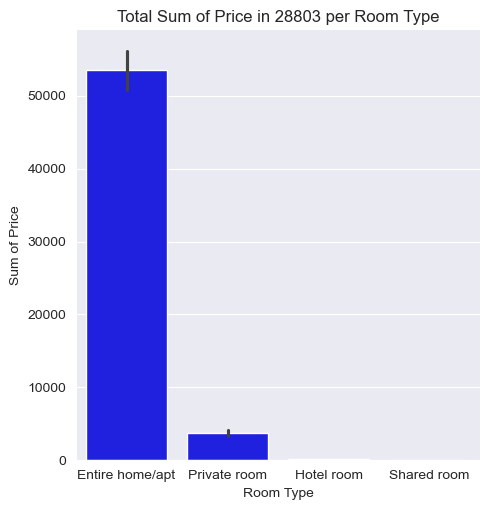

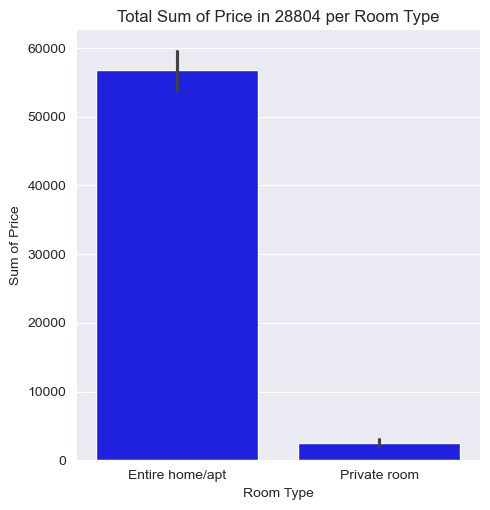

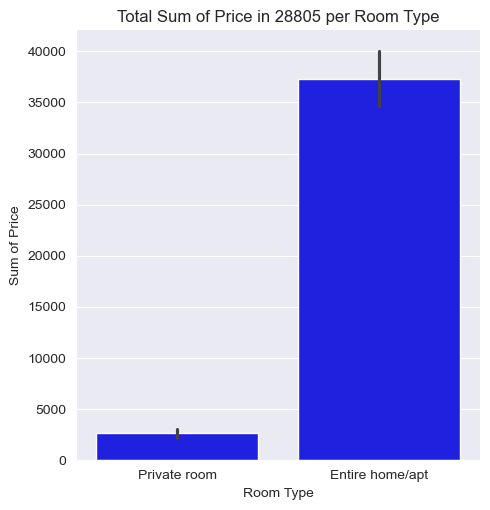

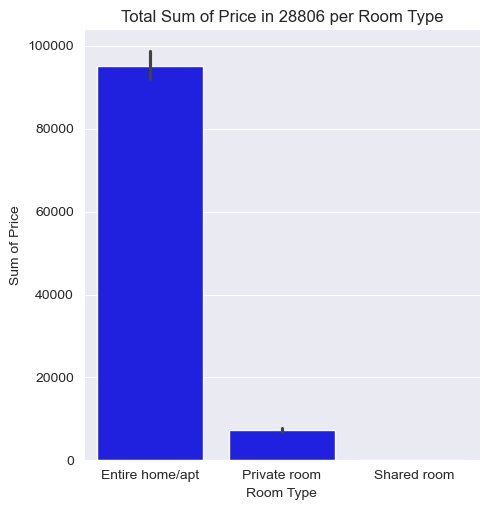

In [78]:
# Creating multiple catplots to view the ratio of listing types for each zipcode
zip_codes = [28704, 28715, 28732, 28801, 28803, 28804, 28805, 28806]

plots = []

for zip_code in zip_codes:  # Use the list of zip codes directly
    neighborhood_df = df[df["neighbourhood"] == zip_code]  # Use the correct column name
    
    x_val = neighborhood_df["room_type"].tolist()
    y_val = neighborhood_df["price"].tolist()
    z_val = neighborhood_df["sleeping_rooms"].tolist()

    df_listing = pd.DataFrame({"type": x_val, "price": y_val, "sleeping_rooms": z_val})

    plot = sns.catplot(data=df_listing, x="type", y="price", kind="bar", color="blue", estimator=sum)
    plt.title(f"Total Sum of Price in {zip_code} per Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Sum of Price")
    
    plots.append(plot)

plt.show()

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">
    
## Excel Dashboard
</div>

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px;">

Now that we have completed the section of this project using python, we want to download the CSV and upload in into Excel for our data visulization. If you would like access to the data set, pivot table, and dashboard download the xlsx file on github.

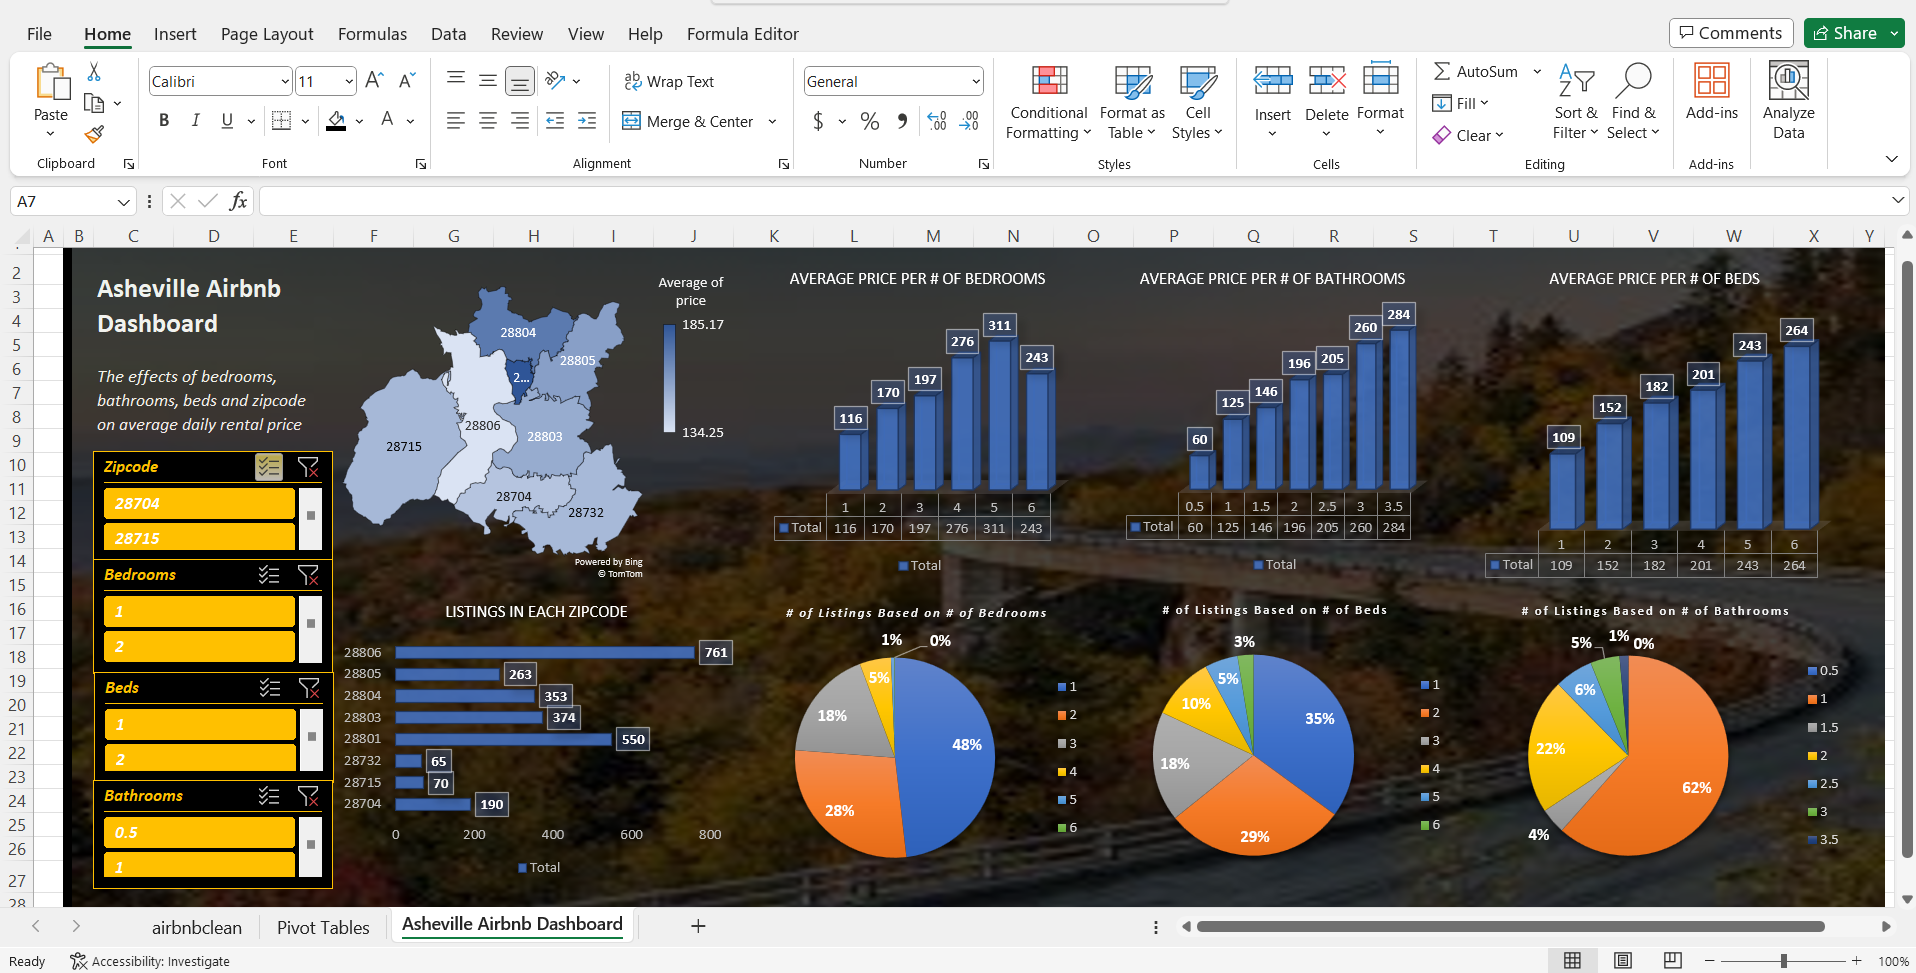

<div style="width: 95%; background-color: #000000; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px; text-align: center; font-size: 20px; font-weight: bold;">
    
## Tableau Dashboard
</div>

<div style="width: 95%; background-color: #00296b; color: #ffffff; padding: 20px; border: 0px solid #243A73; margin-bottom: 20px; border-radius: 10px;">
  Finally, a dashboard was also created inside of Tableau. While this was unnecessary with all of the other visualizations used in this project, I wanted to demonstrate versatility across different platforms. <a href="https://public.tableau.com/app/profile/peige.malys/viz/AshevilleNCAirbnbDashboard/AshevilleDashboard" style="color: #FFD43D; font-weight: bold;">Click here to check out the viz on Tableau Public.</a
</div>

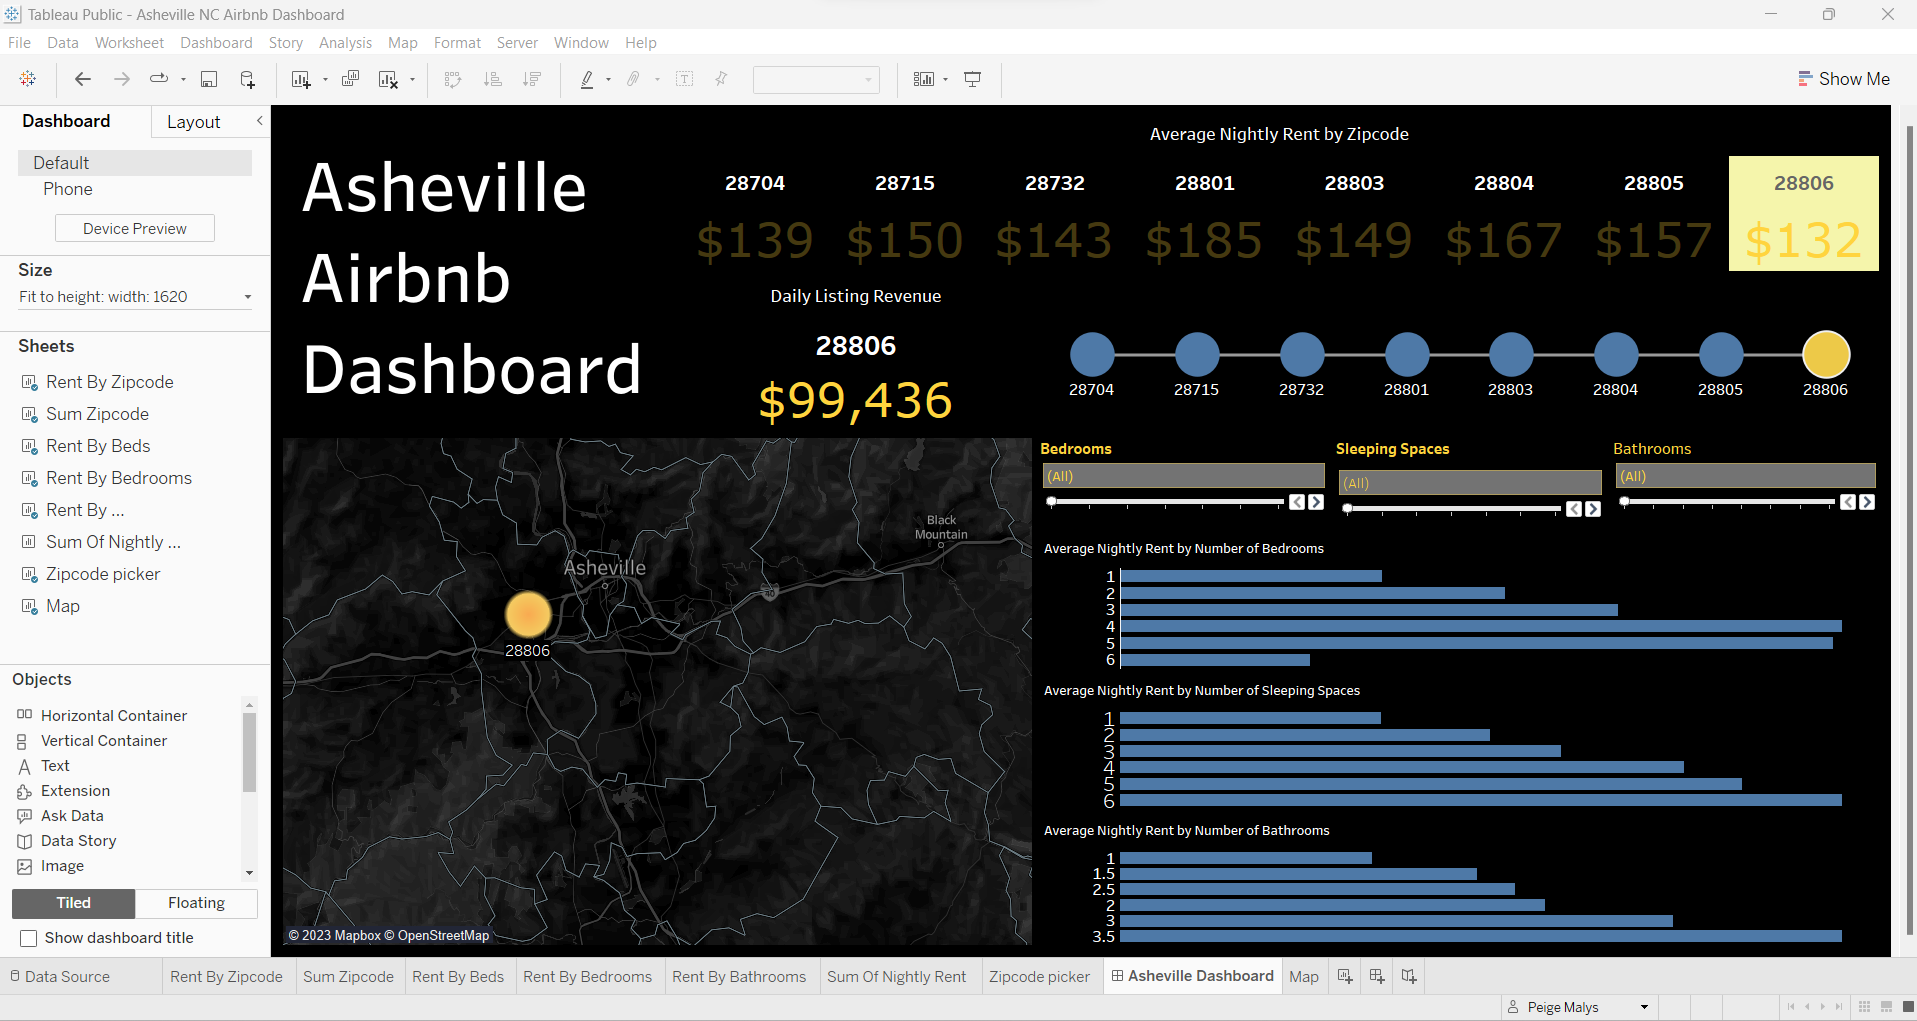